In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
zomato_orgnl=pd.read_csv("zomato.csv")

In [3]:
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_orgnl.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [10]:
# Define a function to remove commas and convert to integer
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == str and x != np.nan else x 

# Assuming 'zomato' is a Pandas DataFrame containing the data
# Convert 'votes' column to integers
zomato['votes'] = zomato['votes'].astype(int)

# Apply the remove_comma function to 'approx_cost_for_2_people' column
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)


In [11]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   51717 non-null  object 
 1   name                      51717 non-null  object 
 2   online_order              51717 non-null  object 
 3   book_table                51717 non-null  object 
 4   rate                      43942 non-null  object 
 5   votes                     51717 non-null  int32  
 6   location                  51696 non-null  object 
 7   rest_type                 51490 non-null  object 
 8   cuisines                  51672 non-null  object 
 9   approx_cost_for_2_people  51371 non-null  float64
 10  reviews_list              51717 non-null  object 
 11  menu_item                 51717 non-null  object 
 12  listed_in_type            51717 non-null  object 
 13  listed_in_city            51717 non-null  object 
dtypes: flo

In [12]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

In [17]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [18]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [19]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   49440 non-null  object 
 1   name                      49440 non-null  object 
 2   online_order              49440 non-null  object 
 3   book_table                49440 non-null  object 
 4   rate                      41665 non-null  float64
 5   votes                     49440 non-null  int32  
 6   location                  49419 non-null  object 
 7   rest_type                 49215 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  reviews_list              49440 non-null  object 
 11  menu_item                 49440 non-null  object 
 12  listed_in_type            49440 non-null  object 
 13  listed_in_city            49440 non-null  object 
dtypes: flo

In [20]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato
zomato_en = Encode(zomato.copy())

In [21]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())

In [22]:
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
dtype: int64

In [23]:
corr = zomato_en.corr(method='kendall')

<Axes: >

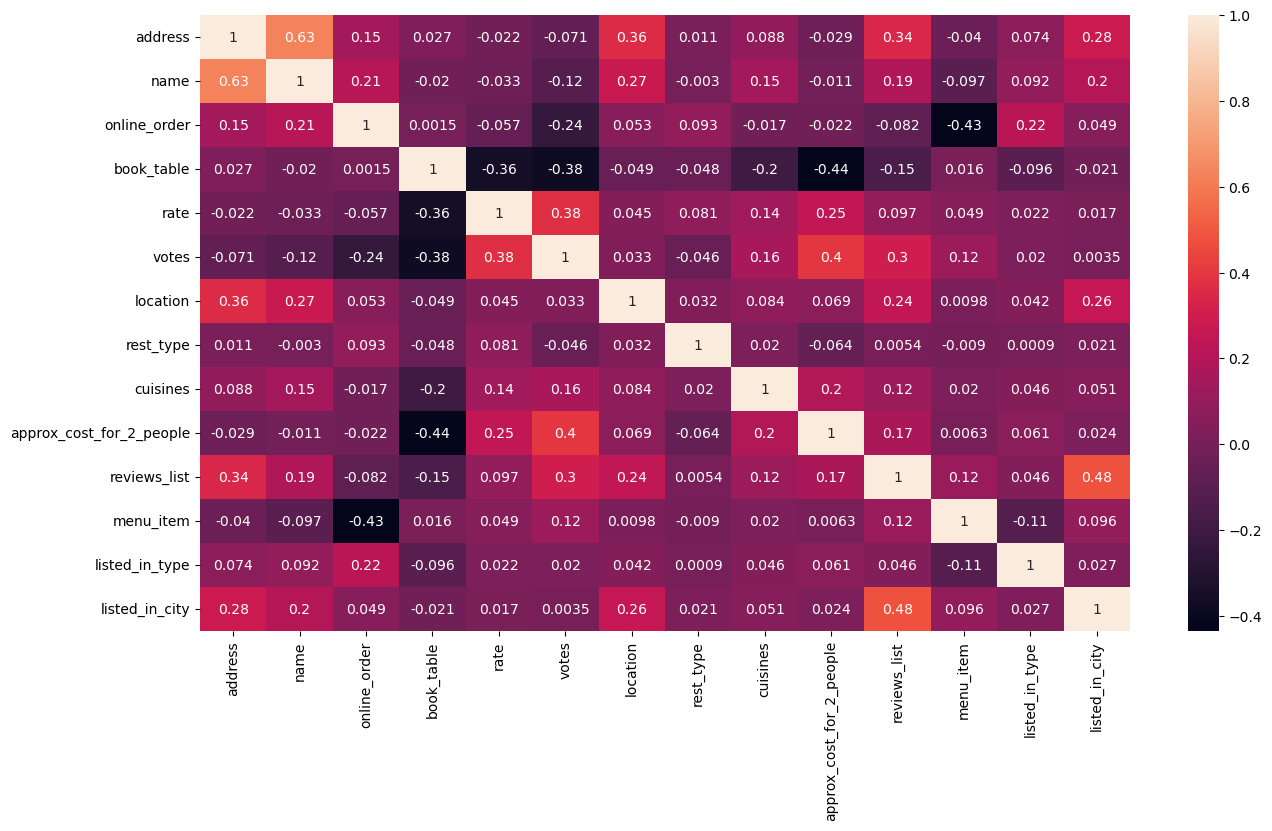

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [25]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [26]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [28]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost_for_2_people,menu_item
2386,0,1,414,3,2,607,500.0,0
17957,1,1,210,77,0,5,700.0,0
6148,1,1,5,24,2,33,200.0,0
353,0,1,59,4,0,5,700.0,0
45525,0,1,123,41,4,298,600.0,863


In [29]:
y_train.head()

2386     4.1
17957    3.8
6148     3.4
353      3.6
45525    3.6
Name: rate, dtype: float64

Linear Regretion

In [30]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.30214916589616647

In [32]:
reg_score=[]
import numpy as np
for j in range(1000):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=j,test_size=0.1)
    lr=LinearRegression().fit(x_train,y_train)
    reg_score.append(lr.score(x_test,y_test))
K=reg_score.index(np.max(reg_score))
#Random state = K=353

Decission Tree Regretion

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [35]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [36]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8399213712963851

In [37]:
from sklearn.tree import DecisionTreeRegressor
ts_score=[]
for j in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
    dc=DecisionTreeRegressor().fit(x_train,y_train)
    ts_score.append(dc.score(x_test,y_test))
J= ts_score.index(np.max(ts_score))

J
#J=105

529

Random Forest Regretion

In [38]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [39]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8356730906449594

In [41]:
rf_score=[]
for k in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.01,random_state=k)
    dtc=RandomForestRegressor().fit(x_train,y_train)
    rf_score.append(dtc.score(x_test,y_test))
K= rf_score.index(np.max(rf_score))
K

KeyboardInterrupt: 

Data Visualization

Text(0.5, 1.0, 'NO. of restaurants in a Location')

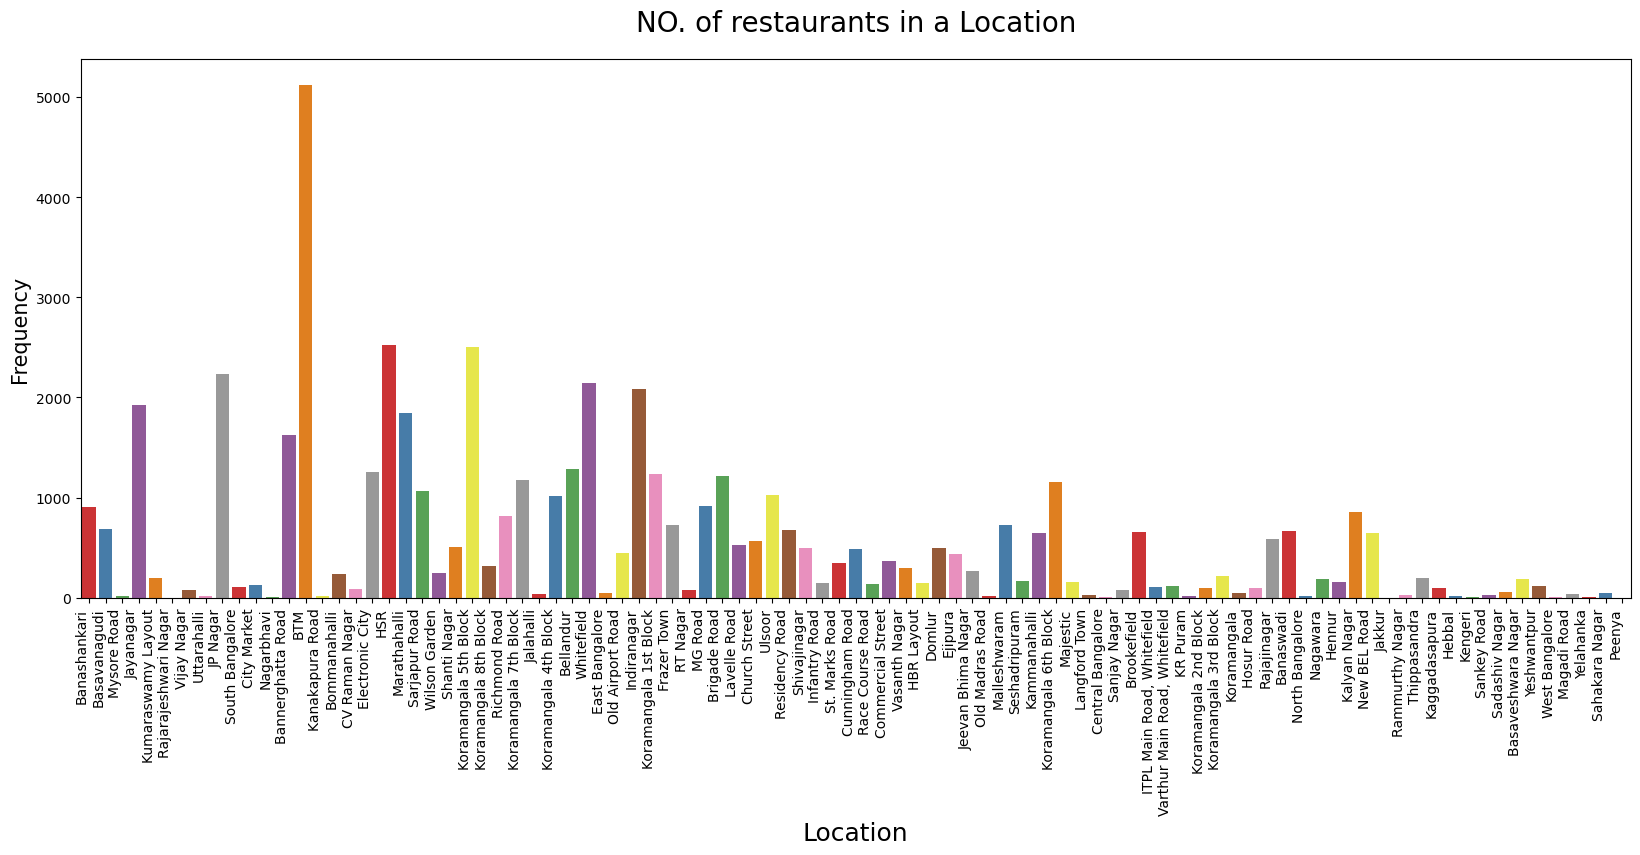

In [42]:
# No. of restaurants in a particular location
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_orgnl, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

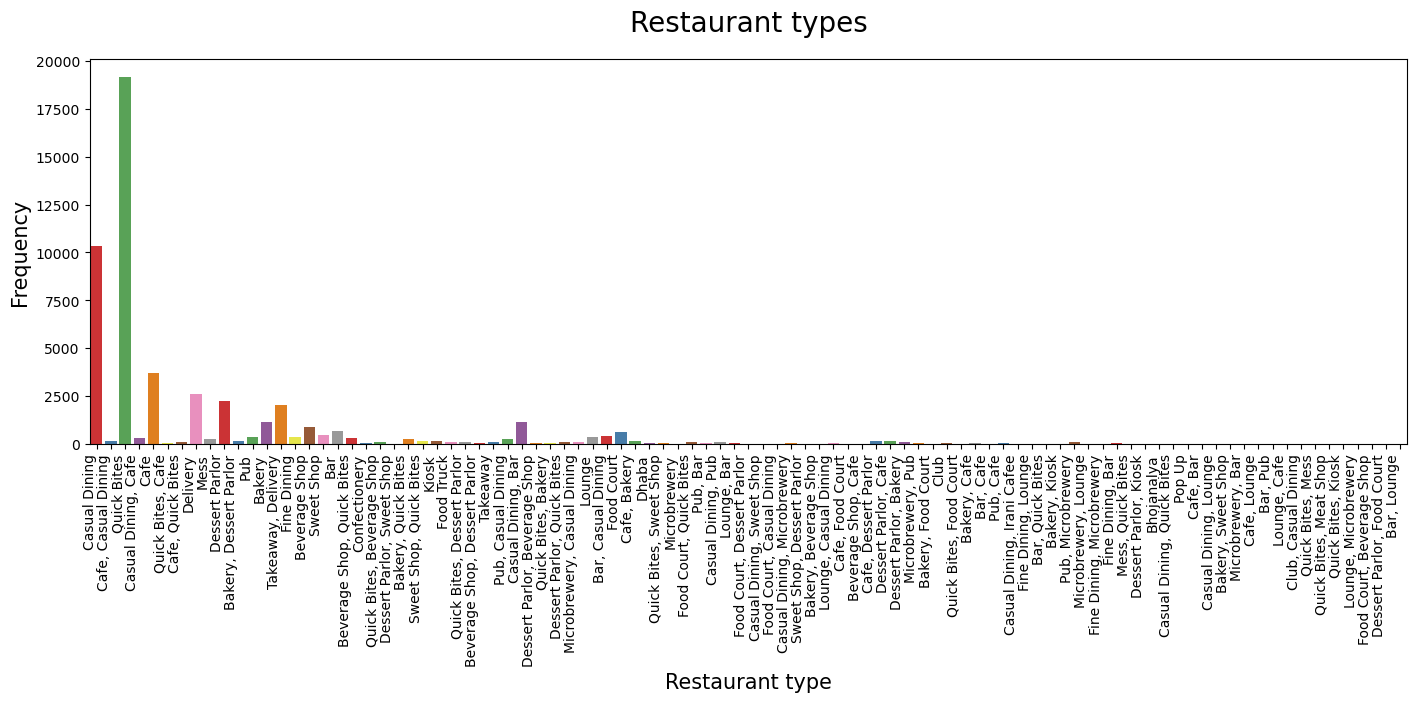

In [43]:
# Frequency of different types of restaurants
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_orgnl, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

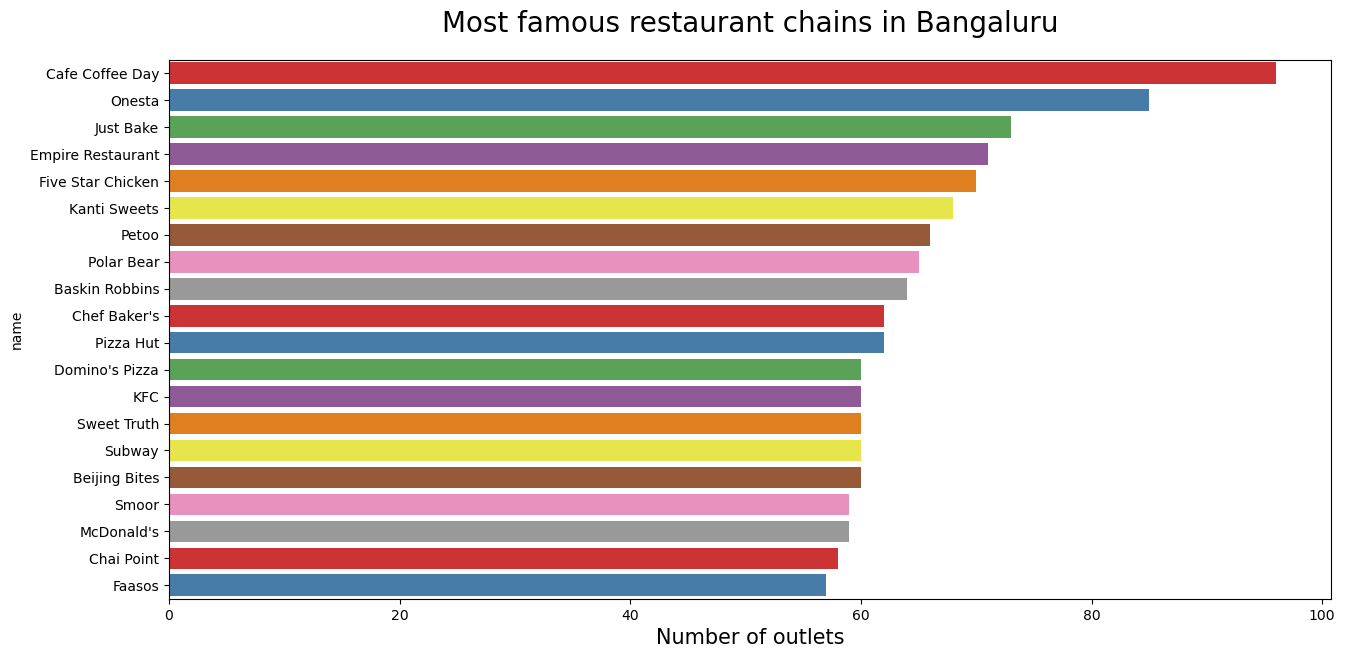

In [44]:
# Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=zomato_orgnl['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Text(0, 0.5, 'Frequency')

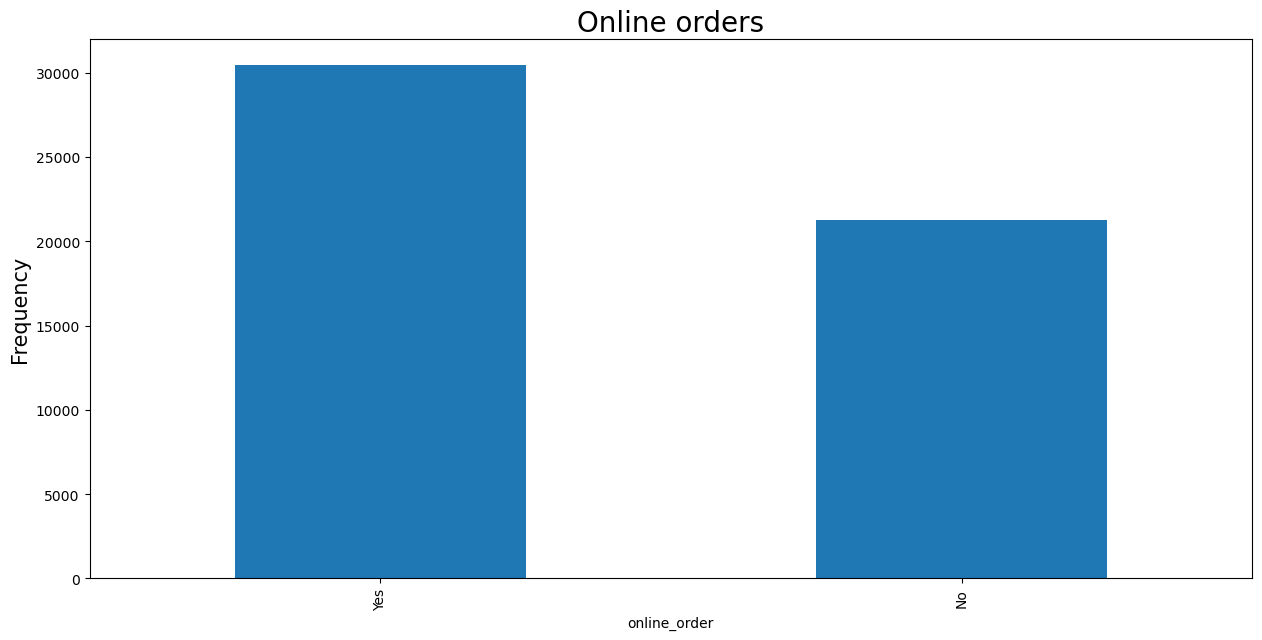

In [45]:
# Number of restaurants taking online order or not
plt.figure(figsize=(15,7))
zomato_orgnl['online_order'].value_counts().plot.bar()
plt.title('Online orders', fontsize = 20)
plt.ylabel('Frequency',size = 15)

Text(0, 0.5, 'Frequency')

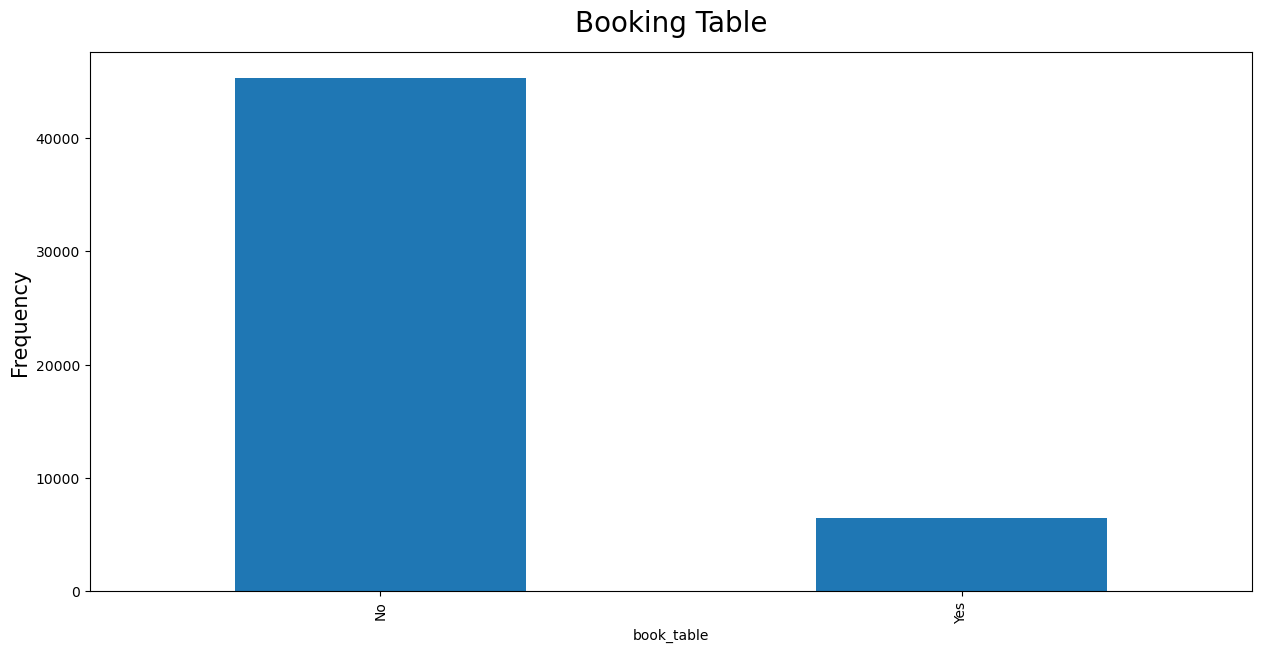

In [46]:
# Frequency of restaurants allowing booking table or not
plt.figure(figsize=(15,7))
zomato_orgnl['book_table'].value_counts().plot.bar()
plt.title('Booking Table', fontsize = 20,pad=15)
plt.ylabel('Frequency', fontsize = 15)

Text(0.5, 1.0, 'Percentage of Restaurants according to their type')

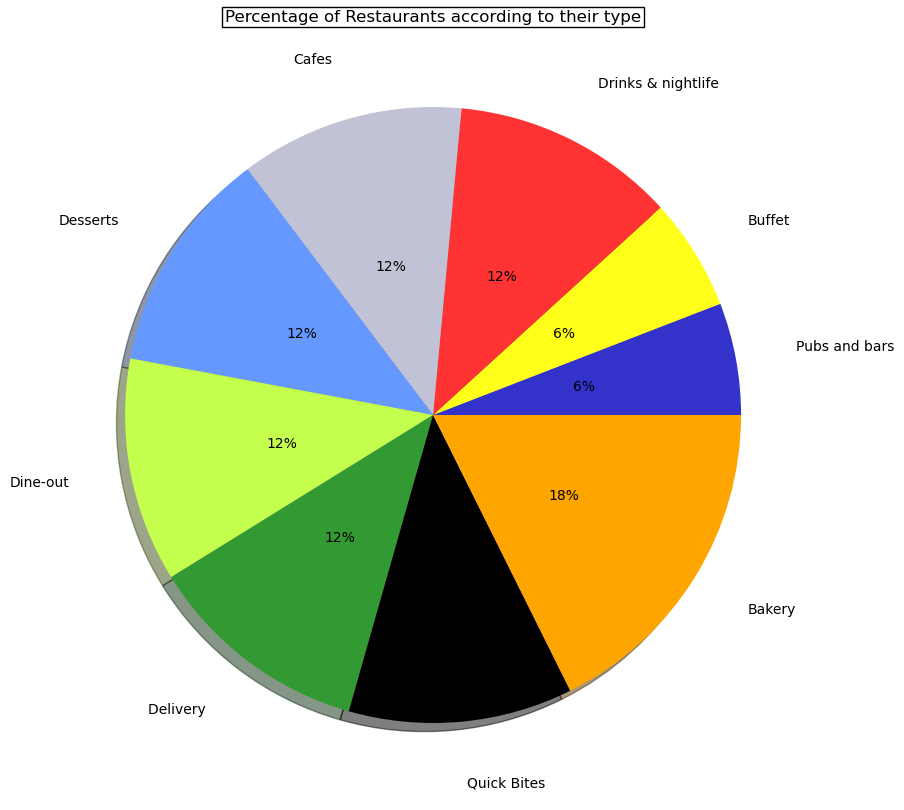

In [48]:
# Percentage of restaurants according to their types
plt.figure(figsize=(10,10))
restaurantTypeCount=zomato_orgnl['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ','Quick Bites','Bakery']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','black','orange']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type", bbox={'facecolor':'1', 'pad':2})

C:\Users\arnab\AppData\Local\Temp\ipykernel_19380\683881135.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zomato_en['approx_cost_for_2_people'],color="magenta")


Text(0, 0.5, 'Percentage of restaurants')

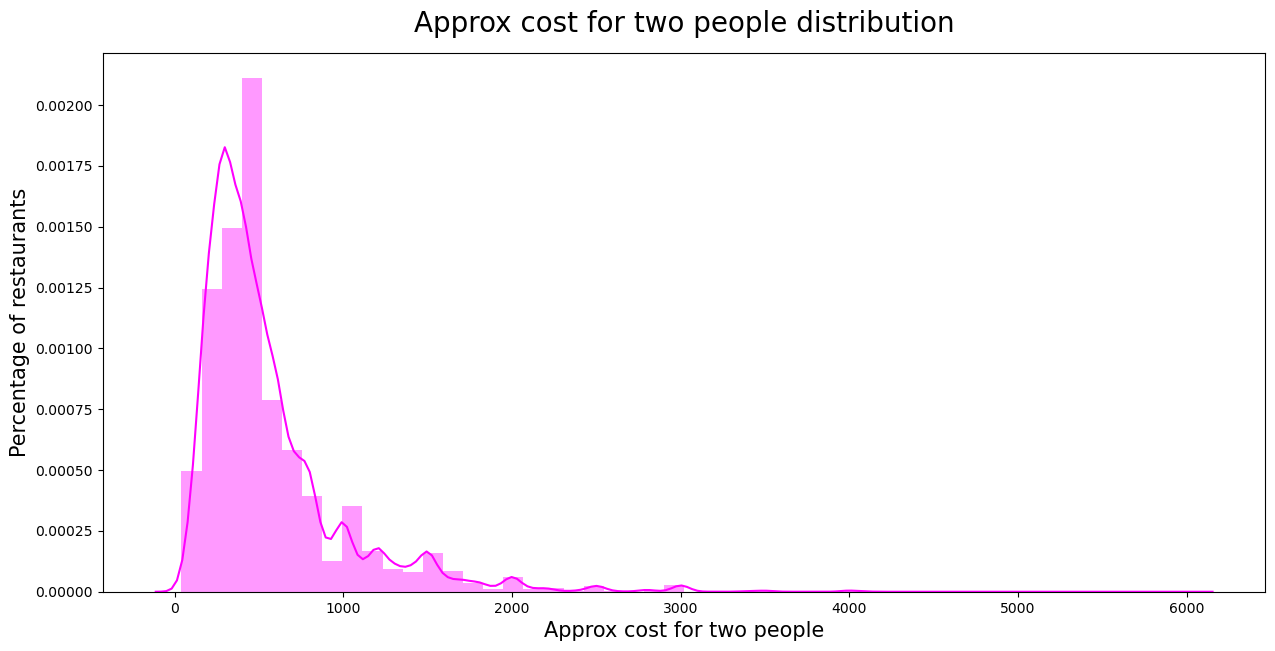

In [49]:
# Distribution of restaurants according to approx cost for two people
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(zomato_en['approx_cost_for_2_people'],color="magenta")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

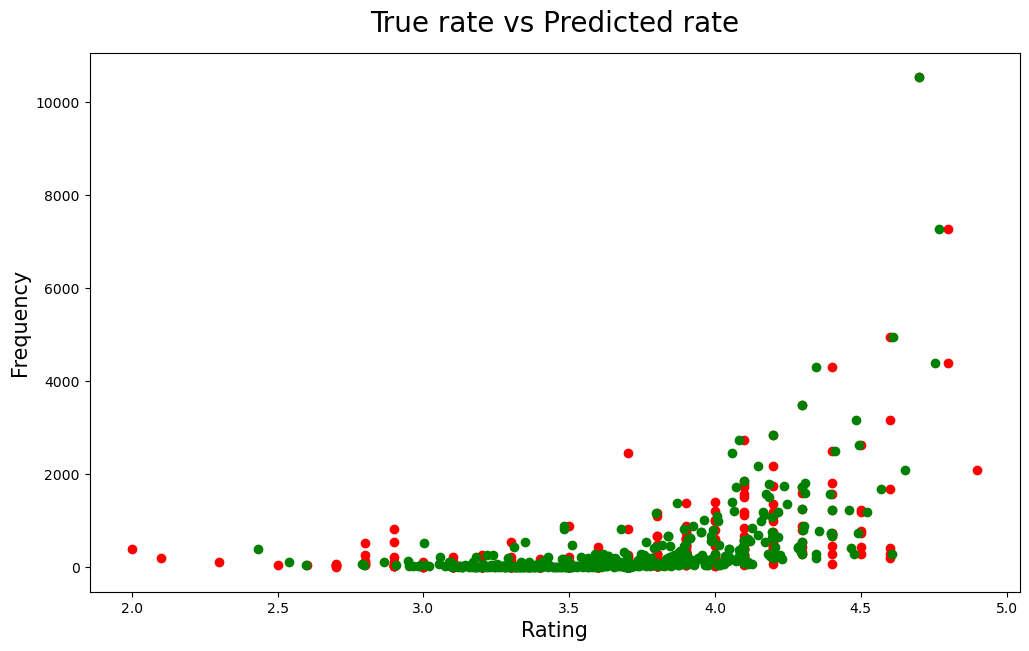

In [50]:
# Showing True rate vs Predicted rate
plt.figure(figsize=(12,7))
preds_rf = RForest.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="green")

Text(0, 0.5, 'No. of restaurants')

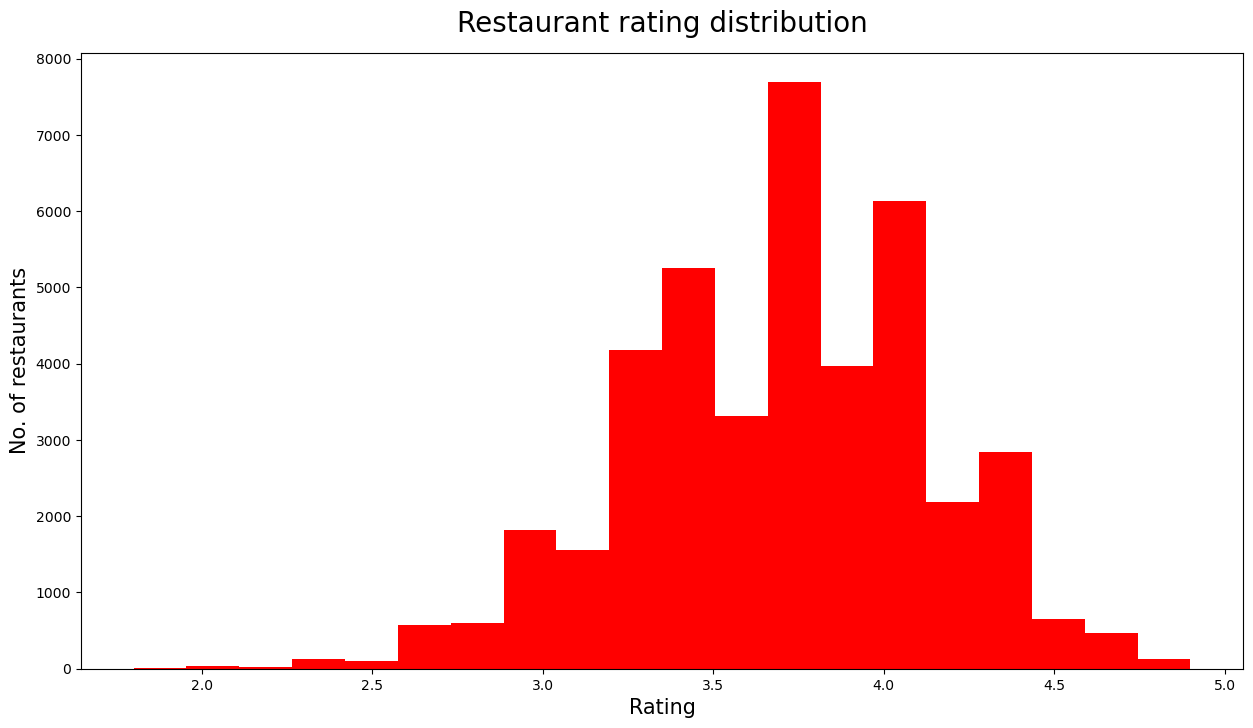

In [51]:
# Restaurant rating distribution
plt.figure(figsize=(15,8))
rating = zomato['rate']
plt.hist(rating,bins=20,color="red")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)

Text(0, 0.5, 'Density')

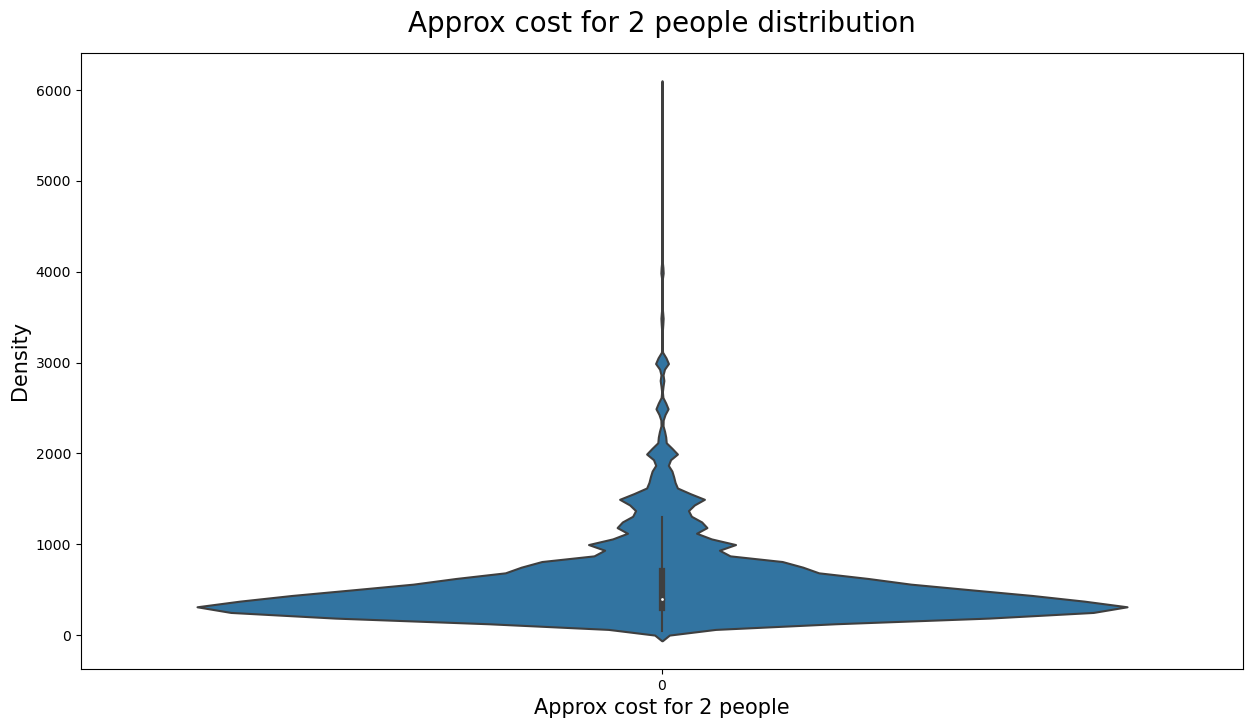

In [52]:
# Approx cost for 2 people distribution
plt.figure(figsize=(15,8))
sns.violinplot(zomato.approx_cost_for_2_people)
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)

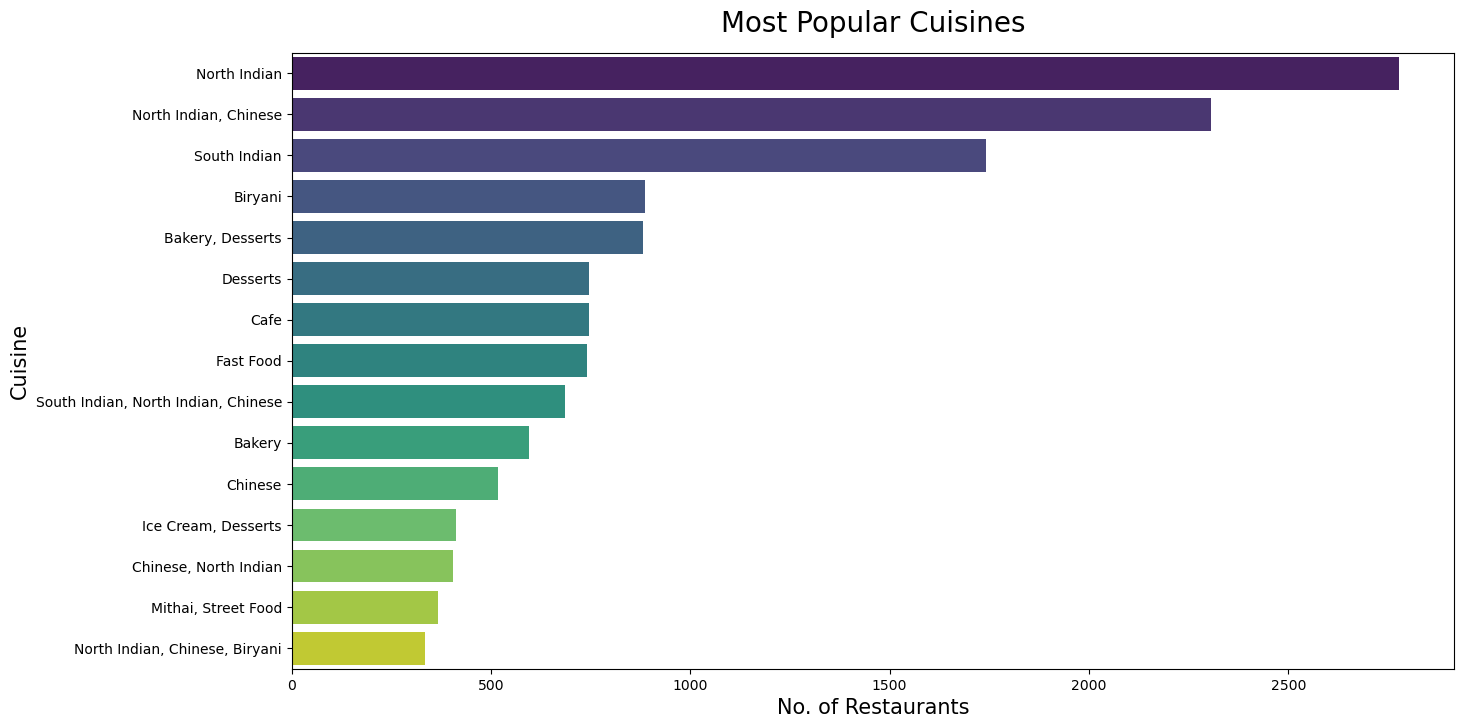

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in the 'cuisines' column and handle them if necessary

# Create a figure and set its size
plt.figure(figsize=(15, 8))

# Count the occurrences of each cuisine
cuisines = zomato['cuisines'].value_counts()[:15]

# Create the bar plot
sns.barplot(x=cuisines.values, y=cuisines.index, palette='viridis')

# Set plot title and axis labels
plt.title('Most Popular Cuisines', size=20, pad=15)
plt.xlabel('No. of Restaurants', size=15)
plt.ylabel('Cuisine', size=15)

# Show the plot
plt.show()
